# Case Study - Diamond Dataset

The dataset consists of almost 54,000 rows and 10 columns:
- price: Price in dollars. Data was collected in 2008.
- carat: Diamond weight. 1 carat is equal to 0.2 grams.
- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- x, y, z: Diamond length, width, and depth, respectively, in mm.
- table: Ratio of width of top face of diamond to its overall width, as a percentage.
- depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only the variables in the top five bullet points: price and the four 'C's of diamond grade. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('./diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [2]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(5)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration
Let's start our exploration by looking at the main variable of interest: price.

### Price distribution

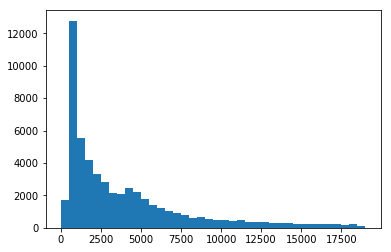

In [4]:
# univariate plot of diamond prices
bins = np.arange(0, diamonds.price.max()+500, 500)
plt.hist(data=diamonds, x='price', bins=bins);

> The distribution is highly right skewed, so we can try to do log tranformations.

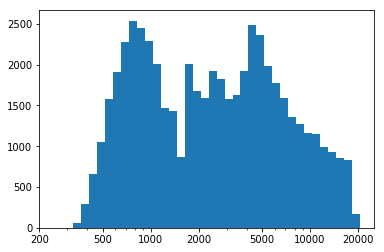

In [5]:
# univariate plot of diamond prices with log scaling
# modify the bin boundaries
log_price = np.log10(diamonds.price)
log_bin_edges = 10 ** np.arange(log_price.min(), log_price.max()+0.05, 0.05)
plt.hist(data=diamonds, x='price', bins=log_bin_edges);
plt.xscale('log')

# # generate more informative ticks
tick_locs = [200, 500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(tick_locs, tick_locs);

> Under a log scale, you can see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. <br><br> The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

### Carat distribution

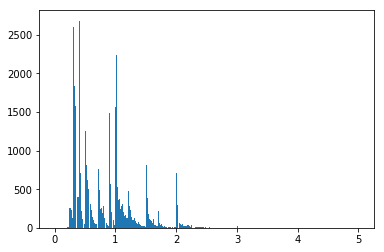

In [6]:
# univariate plot of carat weights
bins = np.arange(0, diamonds.carat.max()+0.01, 0.01)
plt.hist(data=diamonds, x='carat', bins=bins);

> There is an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. <br><br> Let's zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

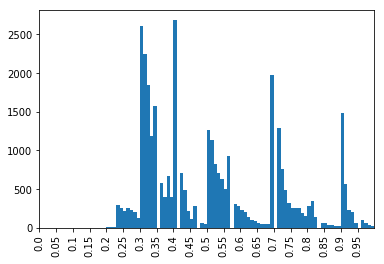

In [7]:
plt.hist(data=diamonds, x='carat', bins=bins);
plt.xlim((0, 1));
tick_loc = np.arange(0, 1, 0.05)
plt.xticks(tick_loc, np.round(tick_loc, 2), rotation=90);

### cut, color, and clarity grades distribution

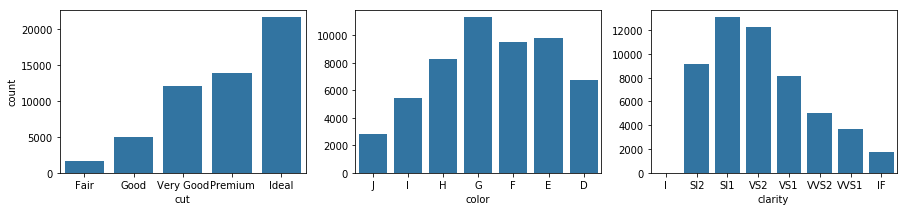

In [8]:
# univariate plots of cut, color, and clarity grades
fig = plt.figure(figsize=(15, 3))
base_color = sns.color_palette()[0]

plt.subplot(1, 3, 1)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.countplot(data=diamonds, x='cut', color=base_color, order=cut_order);

plt.subplot(1, 3, 2)
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
sns.countplot(data=diamonds, x='color', color=base_color, order=color_order)
plt.ylabel('');

plt.subplot(1, 3, 3)
clarity_order = ['I', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.countplot(data=diamonds, x='clarity', color=base_color, order=clarity_order)
plt.ylabel('');

> 1. The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.
2. The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G.
3. There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I).

## Bivariate Exploration

In [9]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

### price against carat weight

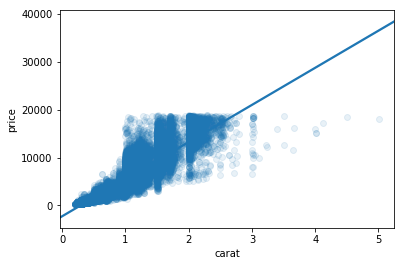

In [10]:
# bivariate plot of price vs. carat
sns.regplot(data=diamonds, x='carat', y='price',
            scatter_kws={'alpha': 1/10})
plt.ylabel('price')
plt.xlabel('carat');

### price (log10) against carat weight

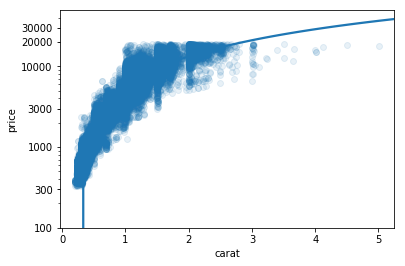

In [11]:
sns.regplot(data=diamonds, x='carat', y='price',
            scatter_kws={'alpha': 1/10})
plt.ylabel('price')
plt.yscale('log')
tick_loc = [100, 300, 1000, 3000, 10000, 20000, 30000]
plt.yticks(tick_loc, tick_loc)
plt.xlabel('carat');

> The transformation should have changed the scatterplot from looking concave upwards to concave downards. <br>It would be nice to have a linear trend, wouldn't it? <br>It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

### price (log10) against cube-root of carat

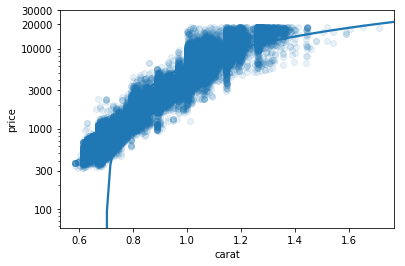

In [12]:
def cube_root_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

carat_cube_root = diamonds.carat.apply(cube_root_trans)    
sns.regplot(data=diamonds, x=carat_cube_root, y='price',
            scatter_kws={'alpha': 1/10})
plt.ylabel('price')
plt.yscale('log')
tick_loc = [100, 300, 1000, 3000, 10000, 20000, 30000]
plt.yticks(tick_loc, tick_loc)
plt.xlabel('carat');

> One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. <br><br>For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

###  bivariate plots of price vs. cut

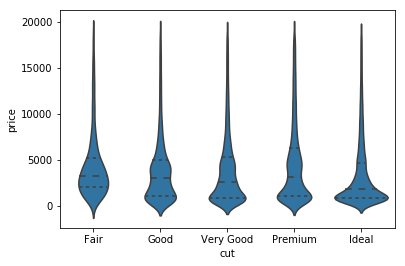

In [13]:
# bivariate plots of price vs. cut
base_color = sns.color_palette()[0]
sns.violinplot(data=diamonds, x='cut', y='price',
               color=base_color, inner='quartile');

###  bivariate plots of price vs. color

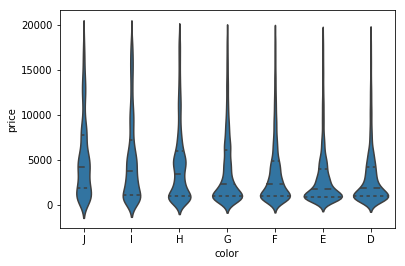

In [14]:
sns.violinplot(data=diamonds, x='color', y='price',
               color=base_color, inner='quartile');

###  bivariate plots of price vs. clarity

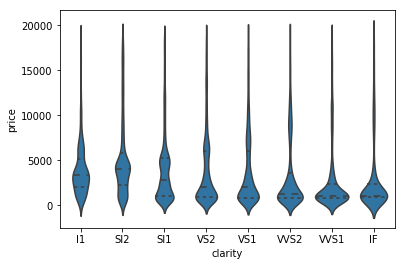

In [15]:
sns.violinplot(data=diamonds, x='clarity', y='price',
               color=base_color, inner='quartile');

> The median price of diamonds tend to look like it _decrease_ with _increasing_ gem quality.

> For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. <br> However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable.

### carat weight change across the other three 'C' quality measures

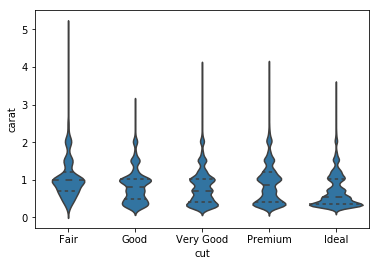

In [16]:
# bivariate plots of carat vs. cut, color, clarity
base_color = sns.color_palette()[0]
sns.violinplot(data=diamonds, x='cut', y='carat',
               color=base_color, inner='quartile');

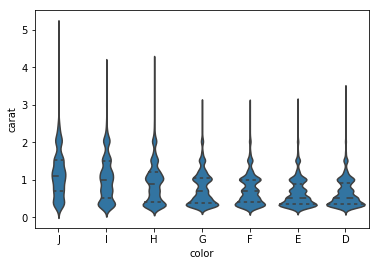

In [17]:
sns.violinplot(data=diamonds, x='color', y='carat',
               color=base_color, inner='quartile');

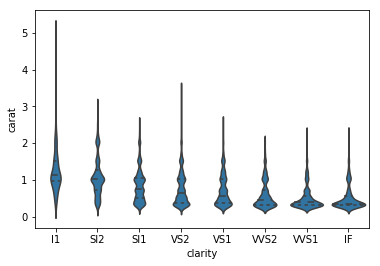

In [18]:
sns.violinplot(data=diamonds, x='clarity', y='carat',
               color=base_color, inner='quartile');

> These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. <br> Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price.